# WINE QUALITY - Logistic Regression

**Purpose:** Build, and visualize Logistic Regression for the Wine Quality dataset.

**Contents:**
1. Prepare
2. Load dataset
3. Preprocessing and EDA
4. Split data
5. Balancing Techniques
6. Model
7. Cross validation summary
8. Final ROC Plot (One-vs-Rest Average)
9. Conclusion

**Notes:** This notebook uses Wine Quality dataset with columns:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality.

# Logistic Regression
- Logistic Regression is a supervised learning algorithm primarily used for classification problems — especially binary classification, such as determining whether an email is spam or not, whether a customer will make a purchase, or whether a transaction is fraudulent, etc.

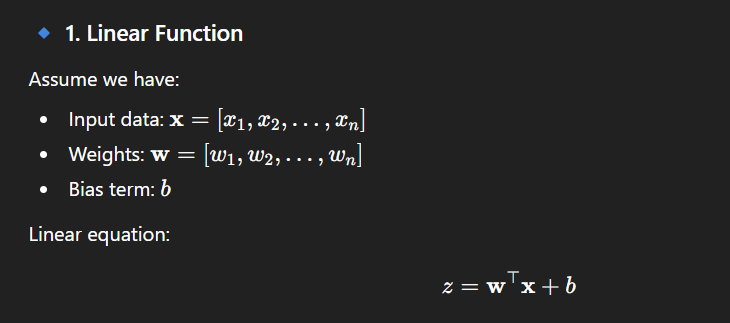

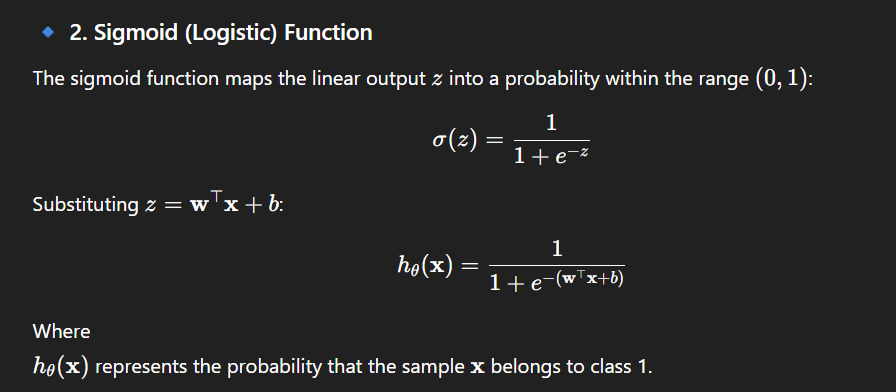

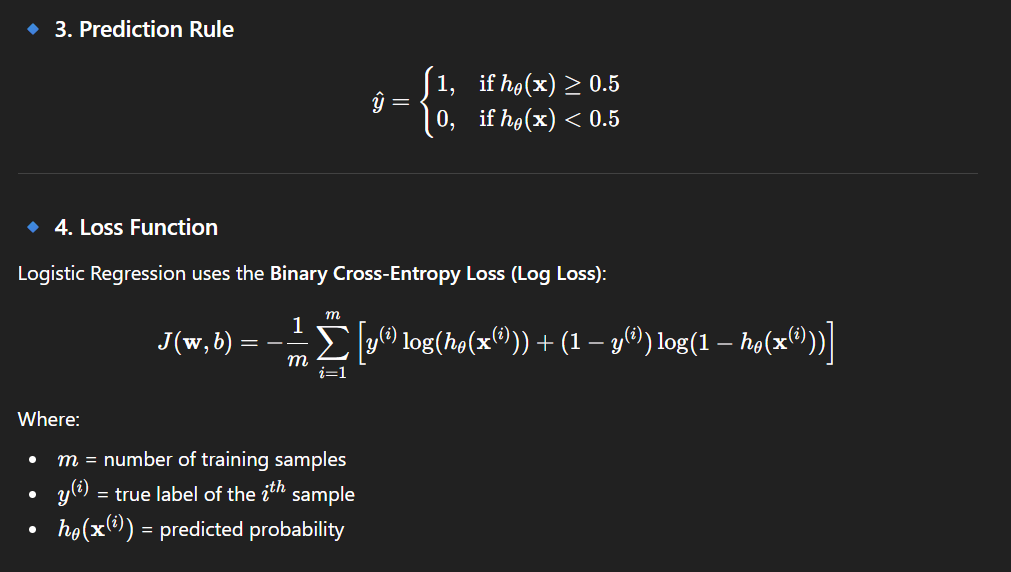

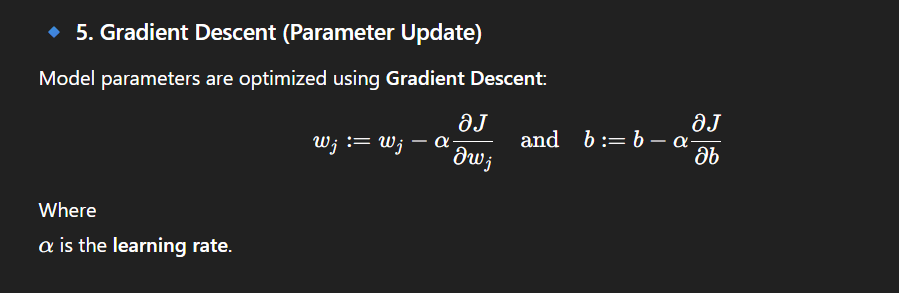

In [ ]:
# ===========================
#  1. Prepare
# ===========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# ===========================
#  2. Load dataset
# ===========================
df = pd.read_csv("Data/Wine_clean.csv")

# Drop the 'Unnamed: 0' column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(" Dataset loaded successfully!")
display(df.head())

 Dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5



--- Data Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1194 non-null   float64
 1   volatile acidity      1194 non-null   float64
 2   citric acid           1194 non-null   float64
 3   residual sugar        1194 non-null   float64
 4   chlorides             1194 non-null   float64
 5   free sulfur dioxide   1194 non-null   float64
 6   total sulfur dioxide  1194 non-null   float64
 7   density               1194 non-null   float64
 8   pH                    1194 non-null   float64
 9   sulphates             1194 non-null   float64
 10  alcohol               1194 non-null   float64
 11  quality               1194 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.1 KB

--- Statistical Summary ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1194.000000
mean,4.284680e-16,-9.521511e-17,7.141133e-17,-2.856453e-16,-1.904302e-16,-5.950944e-17,1.071170e-16,7.236348e-15,3.511057e-16,-6.188982e-16,1.737676e-15,5.640704
std,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,0.766471
min,-2.099646e+00,-2.443625e+00,-1.377452e+00,-2.230359e+00,-2.621812e+00,-1.588798e+00,-1.386636e+00,-2.632285e+00,-2.907515e+00,-2.601823e+00,-1.707596e+00,3.000000
25%,-7.302743e-01,-8.053775e-01,-9.333346e-01,-6.465576e-01,-6.630112e-01,-7.947313e-01,-7.729942e-01,-6.665470e-01,-7.118025e-01,-7.076739e-01,-8.872630e-01,5.000000
50%,-2.509942e-01,-1.659184e-02,-4.509986e-02,-1.940431e-01,-3.339664e-02,-2.275411e-01,-2.360579e-01,1.779778e-02,7.482646e-03,-1.910878e-01,-2.720131e-01,6.000000
75%,5.706289e-01,6.508422e-01,7.876203e-01,7.109860e-01,5.962179e-01,5.665251e-01,5.214057e-01,6.382288e-01,6.321250e-01,5.837913e-01,6.508618e-01,6.000000
max,2.830092e+00,2.926185e+00,2.675119e+00,3.199816e+00,2.834848e+00,3.062162e+00,3.062265e+00,2.761413e+00,2.695338e+00,2.994526e+00,3.111862e+00,8.000000


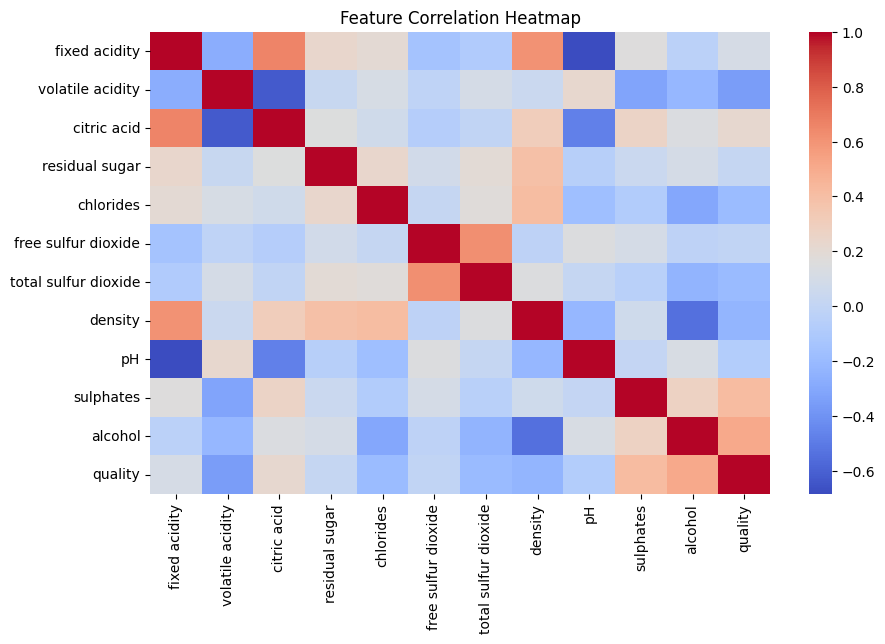

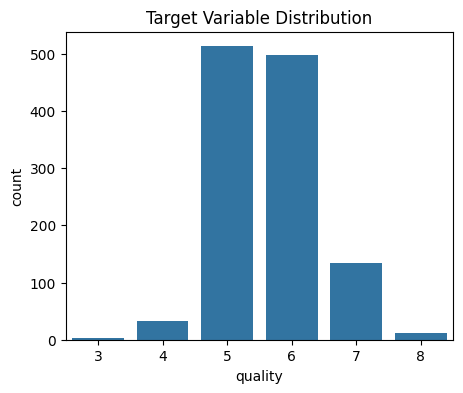

In [ ]:
# ===========================
#  3. Preprocessing & EDA
# ===========================
print("\n--- Data Information ---")
df.info()

print("\n--- Statistical Summary ---")
display(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x=df.columns[-1], data=df)
plt.title("Target Variable Distribution")
plt.show()

In [ ]:
# ===========================
#  4. Split data
# ===========================
X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 955, Testing samples: 239


In [ ]:
# ===========================
#  5. Balancing Techniques
# ===========================
# SMOTE Oversampling
# Adjust k_neighbors for SMOTE to be at most the number of samples in the smallest class minus 1
min_samples = y_train.value_counts().min()
k_neighbors = min(5, max(1, min_samples - 1)) # Ensure k_neighbors is at least 1

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Random Undersampling (if desired)
rus = RandomUnderSampler(random_state=42)
X_train_ru, y_train_ru = rus.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_sm).value_counts())

print("\nClass distribution after Random Undersampling:")
print(pd.Series(y_train_ru).value_counts())


Class distribution after SMOTE:
quality
6    410
5    410
7    410
8    410
4    410
3    410
Name: count, dtype: int64

Class distribution after Random Undersampling:
quality
3    3
4    3
5    3
6    3
7    3
8    3
Name: count, dtype: int64


In [ ]:
# ===========================
#  6. Logistic Regression Model with Stratified K-Fold + SMOTE
# ===========================
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Define model and parameters
lr = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Define Stratified K-Fold (e.g., 5 folds)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Containers for results
acc_scores = []
f1_scores = []
roc_scores = []

# Track ROC for plotting
all_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0
n_classes = len(np.unique(y))
model_classes = np.unique(y)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Apply SMOTE only on training data
    # Dynamically adjust k_neighbors for SMOTE based on the size of the minority class in the current fold
    min_samples_fold = y_train_fold.value_counts().min()
    k_neighbors_fold = min(5, max(1, min_samples_fold - 1)) # Ensure k_neighbors is at least 1

    sm = SMOTE(random_state=42, k_neighbors=k_neighbors_fold)
    X_res, y_res = sm.fit_resample(X_train_fold, y_train_fold)

    # Train model
    lr.fit(X_res, y_res)
    y_pred_fold = lr.predict(X_val_fold)
    y_prob_fold = lr.predict_proba(X_val_fold)

    # Accuracy & F1
    acc = accuracy_score(y_val_fold, y_pred_fold)
    f1 = f1_score(y_val_fold, y_pred_fold, average='weighted')

    # Compute ROC-AUC safely
    try:
        roc_auc = roc_auc_score(
            y_val_fold,
            y_prob_fold,
            multi_class='ovr',
            average='macro'
        )
    except ValueError:
        roc_auc = np.nan  # If some class missing in fold

    acc_scores.append(acc)
    f1_scores.append(f1)
    roc_scores.append(roc_auc)

    print(f"\n--- Fold {fold} ---")
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")




/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



--- Fold 1 ---
Accuracy: 0.3891, F1: 0.4278, ROC-AUC: nan

--- Fold 2 ---
Accuracy: 0.3933, F1: 0.4314, ROC-AUC: 0.7567

--- Fold 3 ---
Accuracy: 0.4351, F1: 0.4913, ROC-AUC: 0.7101

--- Fold 4 ---
Accuracy: 0.4100, F1: 0.4552, ROC-AUC: 0.6794

--- Fold 5 ---
Accuracy: 0.4244, F1: 0.4737, ROC-AUC: nan


In [ ]:
# ======================================
#  7. Cross-validation Summary
# ======================================
print("\n=== Cross-Validation Summary ===")
print(f"Mean Accuracy: {np.nanmean(acc_scores):.4f}")
print(f"Mean F1-Weighted: {np.nanmean(f1_scores):.4f}")
print(f"Mean ROC-AUC: {np.nanmean(roc_scores):.4f}")






=== Cross-Validation Summary ===
Mean Accuracy: 0.4104
Mean F1-Weighted: 0.4559
Mean ROC-AUC: 0.7154


In [ ]:
# ======================================
#  Helper Function for Metrics
# ======================================
from sklearn.metrics import recall_score, precision_score

def print_recall_precision(y_true, y_pred, average='weighted'):
    """
    Calculates and prints weighted average recall and precision scores.

    Args:
        y_true: True labels.
        y_pred: Predicted labels.
        average: Type of averaging for multi-class/multi-label targets.
                 Defaults to 'weighted'.
    """
    recall = recall_score(y_true, y_pred, average=average)
    precision = precision_score(y_true, y_pred, average=average)

    print(f"Recall ({average}): {recall:.4f}")
    print(f"Precision ({average}): {precision:.4f}")

# Call the function with test set results
# Ensure y_test and y_pred_tuned are available from previous cells
if 'y_test' in globals() and 'y_pred_tuned' in globals():
    print("\n--- Test Set Recall and Precision ---")
    print_recall_precision(y_test, y_pred_tuned)
else:
    print("\nNote: y_test or y_pred_tuned not found. Please run the previous cells to generate these variables.")


--- Test Set Recall and Precision ---
Recall (weighted): 0.3598
Precision (weighted): 0.5373


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


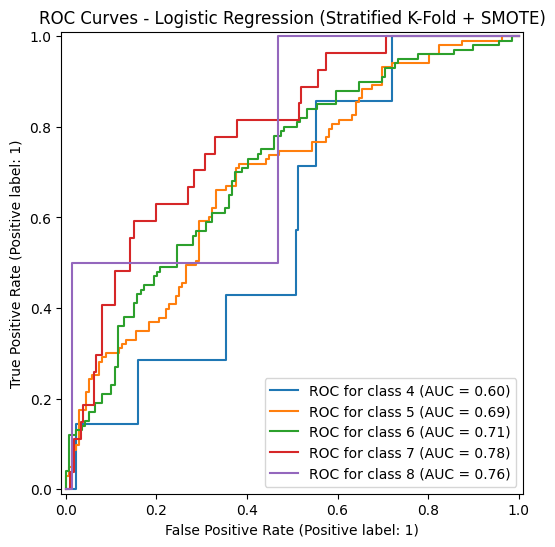

In [ ]:
# ======================================
#  8. Final ROC Plot (One-vs-Rest Average)
# ======================================
plt.figure(figsize=(8, 6))

# Re-train on all data for final ROC visualization
# Dynamically adjust k_neighbors for SMOTE based on the size of the minority class in the full training set
min_samples_full = y_train.value_counts().min()
k_neighbors_full = min(5, max(1, min_samples_full - 1)) # Ensure k_neighbors is at least 1

sm = SMOTE(random_state=42, k_neighbors=k_neighbors_full)
X_final, y_final = sm.fit_resample(X_train, y_train) # Use X_train and y_train for training
lr.fit(X_final, y_final)
y_prob_final = lr.predict_proba(X_test)

for i, class_id in enumerate(lr.classes_):
    if np.any(y_test == class_id):
        RocCurveDisplay.from_predictions(
            y_test == class_id,
            y_prob_final[:, i],
            name=f"ROC for class {class_id}",
            ax=plt.gca(),
            plot_chance_level=(i == 0)
        )

plt.title("ROC Curves - Logistic Regression (Stratified K-Fold + SMOTE)")
plt.show()

## Results Summary

| Metric | Mean Value |
|:--------|:------------|
| **Accuracy** | 0.4104 |
| **Precision** | 0.5373 |
| **Recall** | 0.3598 |
| **F1-Score** | 0.4559 |
| **ROC-AUC** | 0.7154 |

**Observations:**
- The Logistic Regression model achieved an **accuracy of 41%**, showing **moderate classification capability** across classes.  
- The **Precision (0.54)** is higher than **Recall (0.36)**, indicating that the model is **more conservative**, preferring to make fewer but more accurate positive predictions.  
- The **F1-Score (0.46)** suggests **imbalanced performance**, where some classes may be underrepresented or harder to classify.  
- The **ROC-AUC value (0.72)** indicates that the model has **decent discriminative power**, performing better than random guessing.  
- Since the dataset was **pre-standardized**, no additional scaling was applied to prevent data distortion.

---

## Conclusion

- Logistic Regression served as a **baseline model**, establishing a performance benchmark for this dataset.  
- While the model shows **some predictive capability**, the low recall and moderate accuracy suggest the presence of **nonlinear relationships** or **class imbalance**.  
- **Future improvements** could include:
  - Exploring **non-linear classifiers** such as **SVM (RBF kernel)**, **Random Forest**, or **XGBoost**.  
  - Applying **hyperparameter tuning** (e.g., adjusting regularization strength `C` and penalty type).  
  - Performing **feature selection or dimensionality reduction** to enhance generalization.  
  - Addressing **class imbalance** using resampling techniques like **SMOTE** or **undersampling**.  

Overall, Logistic Regression provides a **solid baseline**, but more advanced models are needed to **capture complex decision boundaries** in this dataset.
